In [ ]:
# Set up path for importing modules
import sys, os
sys.path.insert(0, os.path.abspath(".."))
from init_env import set_project_root
project_root = set_project_root()

# Imports
import numpy as np
import algorithmsML as algorithms
import functionsML as functions
from optSolver import optSolverML as optSolver

import scipy.io
import matplotlib.pyplot as plt

# Define three class objects required in 'optSolver' and their attributes 

class Problem:
    def __init__(self, name, w0, X_train, y_train, X_test, y_test):
        self.name = name
        self.w0 = w0
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        match name:
            case "LinearLeastSquares":
                self.compute_f = functions.linear_least_squares_func
                self.compute_g = functions.linear_least_squares_grad
                self.compute_f_g = functions.linear_least_squares_func_grad
                self.predict = functions.linear_least_squares_predict
            case "LogisticRegression": 
                # Lambda function so I only need to pass x
                self.compute_f = functions.logistic_regression_func
                self.compute_g = functions.logistic_regression_grad
                self.compute_f_g = functions.logistic_regression_func_grad
                self.predict = functions.logistic_regression_predict
            case _:
                raise ValueError("problem not defined!!!")
            
class Method:
    def __init__(self, name, **options):
        self.name = name
        self.options = options
        
class Options:
    def __init__(self,term_tol=1e-6, max_iterations=1e2):
        self.term_tol = term_tol
        self.max_iterations = max_iterations  


def generateTrainLossPlots(problem_name, f_star, alpha_const, alpha_dim, history_gd, history_sg_const, history_sg_dim):
    # Plot training and testing accuracy vs gradient evaluations
    plt.figure()
    plt.plot(history_gd['grad_evals'], history_gd['train_loss']-f_star, label='GD')
    plt.plot(history_sg_const['grad_evals'], history_sg_const['train_loss']-f_star, label=f'SG Const (alpha={alpha_const})')
    plt.plot(history_sg_dim['grad_evals'], history_sg_dim['train_loss']-f_star, label=f'SG Dim (alpha={alpha_dim}/k)')
    plt.xlabel('Gradient Evaluations')
    plt.ylabel('F_train(w) - f_star')
    plt.title(f'{problem_name}: Training Optimality Gap vs Gradient Evaluations')
    plt.legend()
    plt.grid()

def generateTestLossPlots(problem_name, alpha_const, alpha_dim, history_gd, history_sg_const, history_sg_dim):
    # Plot training and testing accuracy vs gradient evaluations
    plt.figure()
    plt.plot(history_gd['grad_evals'], history_gd['test_loss'], label='GD')
    plt.plot(history_sg_const['grad_evals'], history_sg_const['test_loss'], label=f'SG Const (alpha={alpha_const})')
    plt.plot(history_sg_dim['grad_evals'], history_sg_dim['test_loss'], label=f'SG Dim (alpha={alpha_dim}/k)')
    plt.xlabel('Gradient Evaluations')
    plt.ylabel('F_test(w)')
    plt.title(f'{problem_name}: Testing Loss vs Gradient Evaluations')
    plt.legend()
    plt.grid()

def generateTrainTestAccPlots(problem_name, alpha_const, alpha_dim, history_gd, history_sg_const, history_sg_dim):
    # Plot training and testing accuracy vs gradient evaluations
    plt.figure()
    plt.plot(history_gd['grad_evals'], history_gd['train_acc'], label='Train GD')
    plt.plot(history_gd['grad_evals'], history_gd['test_acc'], label='Test GD')
    plt.plot(history_sg_const['grad_evals'], history_sg_const['train_acc'], label=f'Train SG Const (alpha={alpha_const})')
    plt.plot(history_sg_const['grad_evals'], history_sg_const['test_acc'], label=f'Test SG Const (alpha={alpha_const})')
    plt.plot(history_sg_dim['grad_evals'], history_sg_dim['train_acc'], label=f'Train SG Dim (alpha={alpha_dim}/k)')
    plt.plot(history_sg_dim['grad_evals'], history_sg_dim['test_acc'], label=f'Test SG Dim (alpha={alpha_dim}/k)')
    plt.xlabel('Gradient Evaluations')
    plt.ylabel('Accuracy')
    plt.title(f'{problem_name}: Training and Testing Accuracy vs Gradient Evaluations')
    plt.legend()
    plt.grid()

# Australian Analysis

In [96]:
# Load the data
australian = scipy.io.loadmat(project_root / 'hw4/data/australian.mat')

X_train = australian['X_train']
X_test = australian['X_test']

y_train = australian['y_train']
y_test = australian['y_test']

f_star_LR_australian = scipy.io.loadmat(project_root / "hw4/data/f_star_LR_australian.mat")
f_star_LR_australian = f_star_LR_australian['f_star'][0][0]
f_star_LS_australian = scipy.io.loadmat(project_root / "hw4/data/f_star_LS_australian.mat")
f_star_LS_australian = f_star_LS_australian['f_star'][0][0]

w0 = np.zeros((X_train.shape[1], 1))

## Linear Least Squares

### Tinkering

Final train loss:  0.2025178470660393
Final test loss:  0.17857022499035283
Final train accuracy:  0.8620689655172413
Final test accuracy:  0.8763440860215054


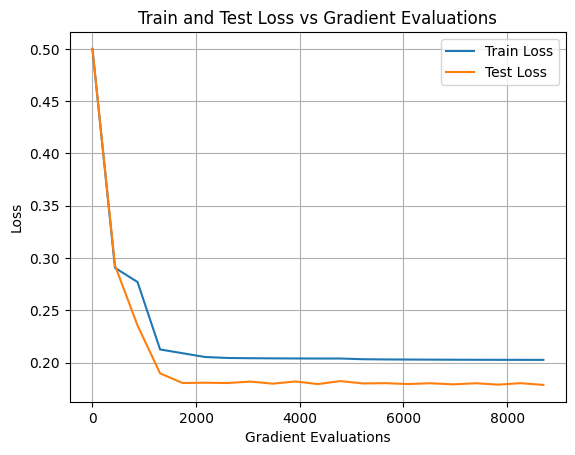

In [69]:
problem = Problem("LinearLeastSquares", w0, X_train, y_train, X_test, y_test)
method = Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5,
                c1=1e-4)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals = history['grad_evals']
train_loss = history['train_loss']
test_loss = history['test_loss']
train_acc = history['train_acc']
test_acc = history['test_acc']

print("Final train loss: ", train_loss_f)
print("Final test loss: ", test_loss_f)
print("Final train accuracy: ", train_acc_f)
print("Final test accuracy: ", test_acc_f)

# Plot train loss vs gradient evaluations
plt.figure()
plt.plot(grad_evals, train_loss, label='Train Loss')
plt.plot(grad_evals, test_loss, label='Test Loss')
plt.xlabel('Gradient Evaluations')
plt.ylabel('Loss')
plt.title('Train and Test Loss vs Gradient Evaluations')
plt.legend()
plt.grid()

Final train loss:  0.20389776927498526
Final test loss:  0.18187784655580055
Final train accuracy:  0.864367816091954
Final test accuracy:  0.8763440860215054


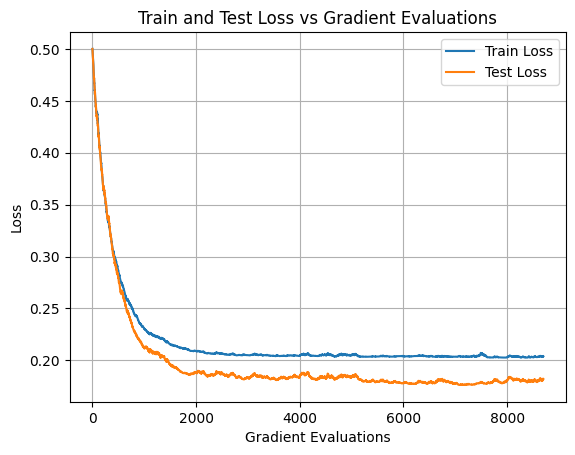

In [76]:
problem = Problem("LinearLeastSquares", w0, X_train, y_train, X_test, y_test)
method = Method("StochasticGradient", step_type="Constant", constant_step_size=1e-3, batch_size=1)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals = history['grad_evals']
train_loss = history['train_loss']
test_loss = history['test_loss']
train_acc = history['train_acc']
test_acc = history['test_acc']

print("Final train loss: ", train_loss_f)
print("Final test loss: ", test_loss_f)
print("Final train accuracy: ", train_acc_f)
print("Final test accuracy: ", test_acc_f)

# Plot train loss vs gradient evaluations
plt.figure()
plt.plot(grad_evals, train_loss, label='Train Loss')
plt.plot(grad_evals, test_loss, label='Test Loss')
plt.xlabel('Gradient Evaluations')
plt.ylabel('Loss')
plt.title('Train and Test Loss vs Gradient Evaluations')
plt.legend()
plt.grid()

Final train loss:  0.20785769058419318
Final test loss:  0.17625610320089097
Final train accuracy:  0.864367816091954
Final test accuracy:  0.8763440860215054


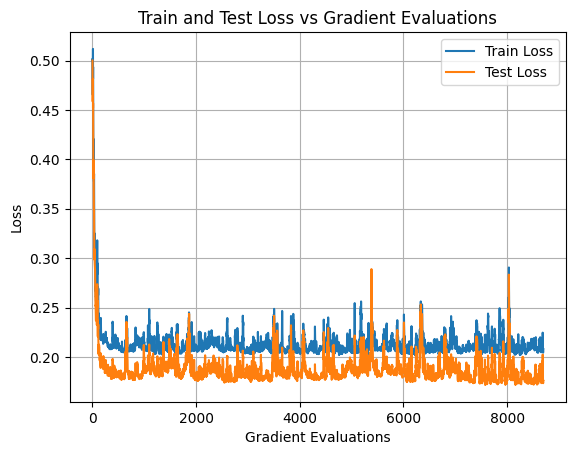

In [77]:
problem = Problem("LinearLeastSquares", w0, X_train, y_train, X_test, y_test)
method = Method("StochasticGradient", step_type="Constant", constant_step_size=1e-2, batch_size=1)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals = history['grad_evals']
train_loss = history['train_loss']
test_loss = history['test_loss']
train_acc = history['train_acc']
test_acc = history['test_acc']

print("Final train loss: ", train_loss_f)
print("Final test loss: ", test_loss_f)
print("Final train accuracy: ", train_acc_f)
print("Final test accuracy: ", test_acc_f)

# Plot train loss vs gradient evaluations
plt.figure()
plt.plot(grad_evals, train_loss, label='Train Loss')
plt.plot(grad_evals, test_loss, label='Test Loss')
plt.xlabel('Gradient Evaluations')
plt.ylabel('Loss')
plt.title('Train and Test Loss vs Gradient Evaluations')
plt.legend()
plt.grid()

Final train loss:  0.2371503879081729
Final test loss:  0.22256619703923988
Final train accuracy:  0.8689655172413793
Final test accuracy:  0.9032258064516129


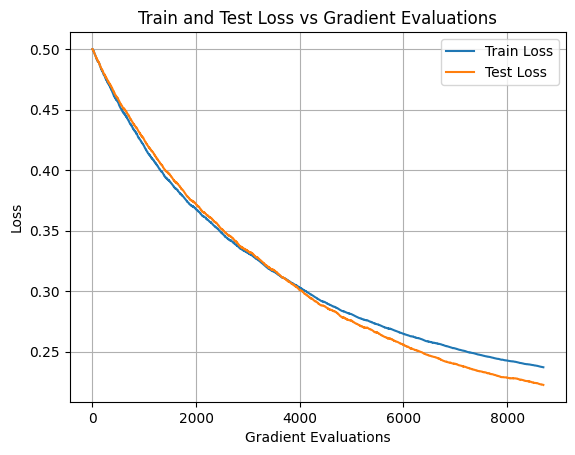

In [78]:
problem = Problem("LinearLeastSquares", w0, X_train, y_train, X_test, y_test)
method = Method("StochasticGradient", step_type="Constant", constant_step_size=1e-4, batch_size=1)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals = history['grad_evals']
train_loss = history['train_loss']
test_loss = history['test_loss']
train_acc = history['train_acc']
test_acc = history['test_acc']

print("Final train loss: ", train_loss_f)
print("Final test loss: ", test_loss_f)
print("Final train accuracy: ", train_acc_f)
print("Final test accuracy: ", test_acc_f)

# Plot train loss vs gradient evaluations
plt.figure()
plt.plot(grad_evals, train_loss, label='Train Loss')
plt.plot(grad_evals, test_loss, label='Test Loss')
plt.xlabel('Gradient Evaluations')
plt.ylabel('Loss')
plt.title('Train and Test Loss vs Gradient Evaluations')
plt.legend()
plt.grid()

Final train loss:  0.4202178766610434
Final test loss:  0.4274382912674781
Final train accuracy:  0.7908045977011494
Final test accuracy:  0.7956989247311828


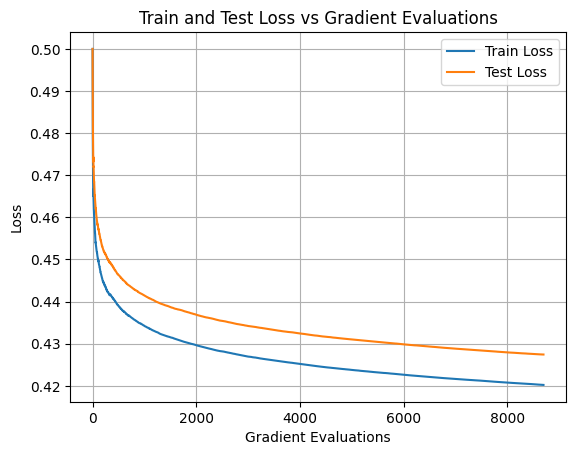

In [119]:
problem = Problem("LinearLeastSquares", w0, X_train, y_train, X_test, y_test)
method = Method("StochasticGradient", step_type="Diminishing", alpha=1e-2, batch_size=1)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals = history['grad_evals']
train_loss = history['train_loss']
test_loss = history['test_loss']
train_acc = history['train_acc']
test_acc = history['test_acc']

print("Final train loss: ", train_loss_f)
print("Final test loss: ", test_loss_f)
print("Final train accuracy: ", train_acc_f)
print("Final test accuracy: ", test_acc_f)

# Plot train loss vs gradient evaluations
plt.figure()
plt.plot(grad_evals, train_loss, label='Train Loss')
plt.plot(grad_evals, test_loss, label='Test Loss')
plt.xlabel('Gradient Evaluations')
plt.ylabel('Loss')
plt.title('Train and Test Loss vs Gradient Evaluations')
plt.legend()
plt.grid()

### Results

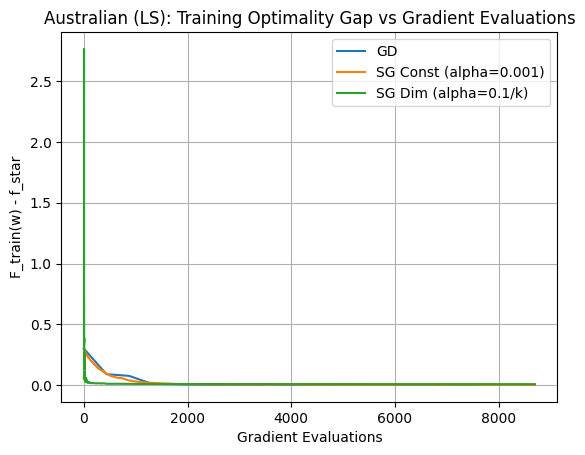

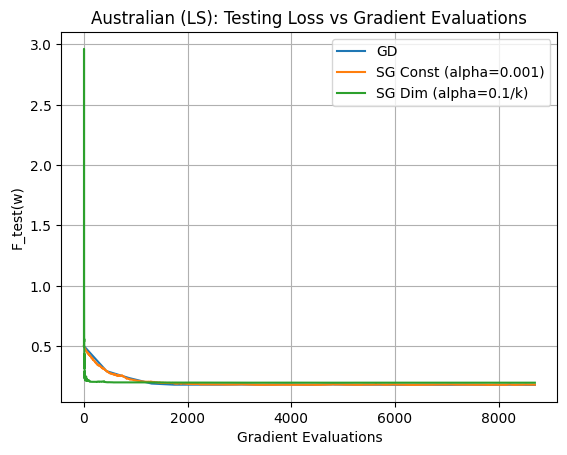

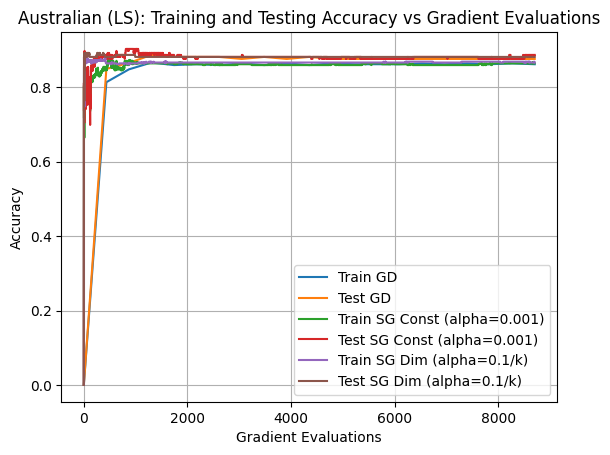

In [118]:
# Gradient Descent with backtracking
problem = Problem("LinearLeastSquares", w0, X_train, y_train, X_test, y_test)
method = Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5,
                c1=1e-4)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history_gd = optSolver(problem, method, options)

# Stochastic Gradient Descent with constant step size
method = Method("StochasticGradient", step_type="Constant", constant_step_size=1e-3, batch_size=1)
w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history_sg_const = optSolver(problem, method, options)

# Stochastic Gradient Descent with constant step size
method = Method("StochasticGradient", step_type="Diminishing", alpha = 0.5)
w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history_sg_dim = optSolver(problem, method, options)

generateTrainLossPlots("Australian (LS)", f_star_LS_australian, 1e-3, 1e-1, history_gd, history_sg_const, history_sg_dim)
generateTestLossPlots("Australian (LS)", 1e-3, 1e-1, history_gd, history_sg_const, history_sg_dim)
generateTrainTestAccPlots("Australian (LS)", 1e-3, 1e-1, history_gd, history_sg_const, history_sg_dim)


## Logistic Regression

### Tinkering

Final train loss:  0.33184114976842016
Final test loss:  0.30943331513276523
Final train accuracy:  0.864367816091954
Final test accuracy:  0.8870967741935484


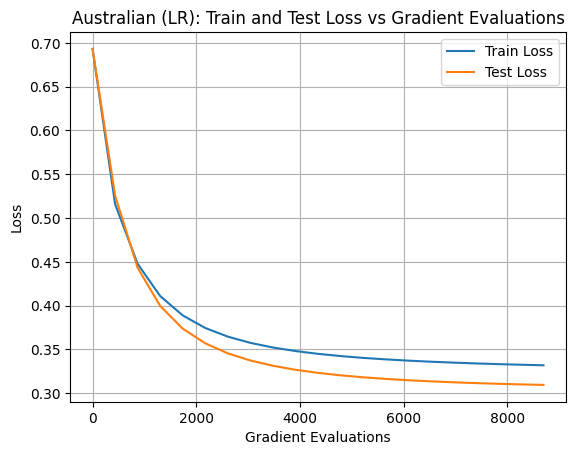

In [5]:
problem = Problem("LogisticRegression", w0, X_train, y_train, X_test, y_test)
method = Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5,
                c1=1e-4)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals = history['grad_evals']
train_loss = history['train_loss']
test_loss = history['test_loss']
train_acc = history['train_acc']
test_acc = history['test_acc']

print("Final train loss: ", train_loss_f)
print("Final test loss: ", test_loss_f)
print("Final train accuracy: ", train_acc_f)
print("Final test accuracy: ", test_acc_f)

# Plot train loss vs gradient evaluations
plt.figure()
plt.plot(grad_evals, train_loss, label='Train Loss')
plt.plot(grad_evals, test_loss, label='Test Loss')
plt.xlabel('Gradient Evaluations')
plt.ylabel('Loss')
plt.title('Australian (LR): Train and Test Loss vs Gradient Evaluations')
plt.legend()
plt.grid()

Final train loss:  0.3309959193385989
Final test loss:  0.3132737568302087
Final train accuracy:  0.871264367816092
Final test accuracy:  0.8870967741935484


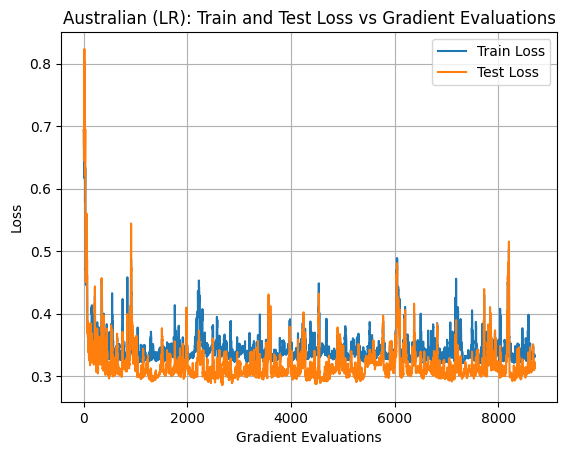

In [121]:
problem = Problem("LogisticRegression", w0, X_train, y_train, X_test, y_test)
method = Method("StochasticGradient", step_type="Constant", constant_step_size=1e-1, batch_size=1)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals = history['grad_evals']
train_loss = history['train_loss']
test_loss = history['test_loss']
train_acc = history['train_acc']
test_acc = history['test_acc']

print("Final train loss: ", train_loss_f)
print("Final test loss: ", test_loss_f)
print("Final train accuracy: ", train_acc_f)
print("Final test accuracy: ", test_acc_f)

# Plot train loss vs gradient evaluations
plt.figure()
plt.plot(grad_evals, train_loss, label='Train Loss')
plt.plot(grad_evals, test_loss, label='Test Loss')
plt.xlabel('Gradient Evaluations')
plt.ylabel('Loss')
plt.title('Australian (LR): Train and Test Loss vs Gradient Evaluations')
plt.legend()
plt.grid()

Final train loss:  0.667200203890408
Final test loss:  0.6712794801076059
Final train accuracy:  0.664367816091954
Final test accuracy:  0.5913978494623656


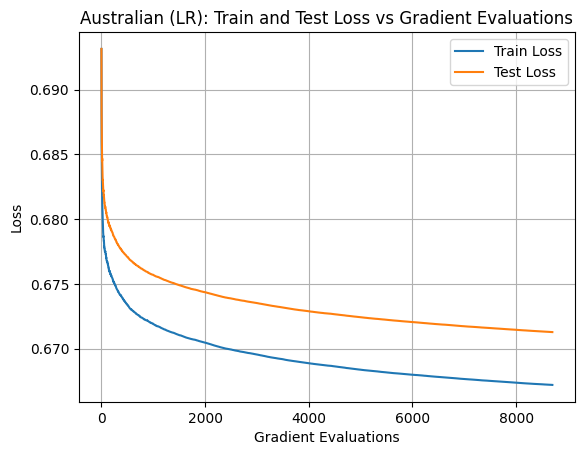

In [ ]:
problem = Problem("LogisticRegression", w0, X_train, y_train, X_test, y_test)
method = Method("StochasticGradient", step_type="Diminishing", alpha=1e-2, batch_size=1)
# 1e-2 clearly best
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals = history['grad_evals']
train_loss = history['train_loss']
test_loss = history['test_loss']
train_acc = history['train_acc']
test_acc = history['test_acc']

print("Final train loss: ", train_loss_f)
print("Final test loss: ", test_loss_f)
print("Final train accuracy: ", train_acc_f)
print("Final test accuracy: ", test_acc_f)

# Plot train loss vs gradient evaluations
plt.figure()
plt.plot(grad_evals, train_loss, label='Train Loss')
plt.plot(grad_evals, test_loss, label='Test Loss')
plt.xlabel('Gradient Evaluations')
plt.ylabel('Loss')
plt.title('Australian (LR): Train and Test Loss vs Gradient Evaluations')
plt.legend()
plt.grid()

### Results

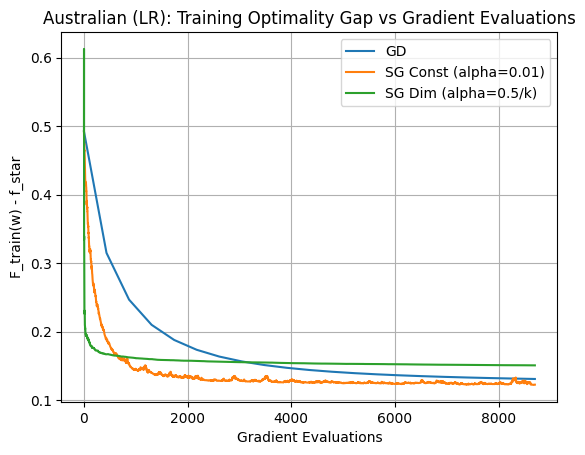

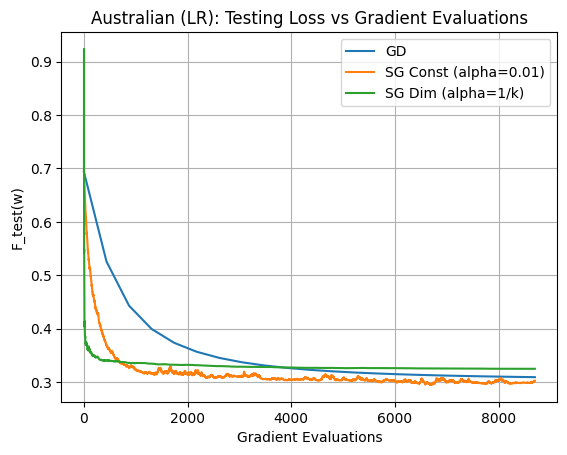

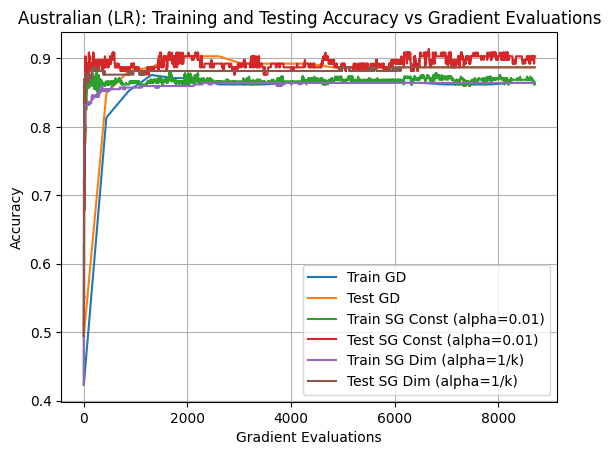

In [115]:
# Gradient Descent with backtracking
problem = Problem("LogisticRegression", w0, X_train, y_train, X_test, y_test)
method = Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5,
                c1=1e-4)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history_gd = optSolver(problem, method, options)

# Stochastic Gradient Descent with constant step size
method = Method("StochasticGradient", step_type="Constant", constant_step_size=1e-2, batch_size=1)
w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history_sg_const = optSolver(problem, method, options)

# Stochastic Gradient Descent with constant step size
method = Method("StochasticGradient", step_type="Diminishing", alpha = 1)
w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history_sg_dim = optSolver(problem, method, options)

generateTrainLossPlots("Australian (LR)", f_star_LS_australian, 1e-2, 0.5, history_gd, history_sg_const, history_sg_dim)
generateTestLossPlots("Australian (LR)", 1e-2, 1, history_gd, history_sg_const, history_sg_dim)
generateTrainTestAccPlots("Australian (LR)", 1e-2, 1, history_gd, history_sg_const, history_sg_dim)


# Mushroom Analysis

In [124]:
# Load the data
mushroom = scipy.io.loadmat(project_root / "hw4/data/mushroom.mat")

f_star_LR_mushroom = scipy.io.loadmat(project_root / "hw4/data/f_star_LR_mushroom.mat")
f_star_LR_mushroom = f_star_LR_mushroom['f_star'][0][0]
f_star_LS_mushroom = scipy.io.loadmat(project_root / "hw4/data/f_star_LS_mushroom.mat")
f_star_LS_mushroom = f_star_LS_mushroom['f_star'][0][0]

X_train = mushroom['X_train']
X_test = mushroom['X_test']

y_train = mushroom['y_train']
y_test = mushroom['y_test']

w0 = np.zeros((X_train.shape[1], 1))

## Linear Least Squares
Note: Numerical instability with stepsize=1

### Tinkering with learing rates

Final train loss:  0.0029940973359013764
Final test loss:  0.0025962936841306314
Final train accuracy:  0.9997402597402597
Final test accuracy:  1.0


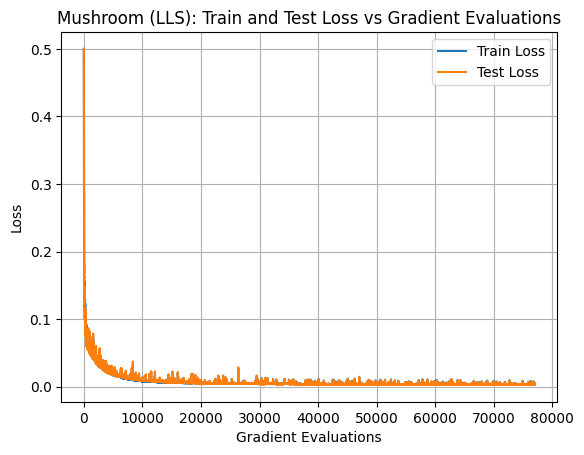

In [38]:
problem = Problem("LinearLeastSquares", w0, X_train, y_train, X_test, y_test)
# method = Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5,
#                 c1=1e-4)
method = Method("StochasticGradient", step_type="Constant", constant_step_size=1e-2, batch_size=1)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals = history['grad_evals']
train_loss = history['train_loss']
test_loss = history['test_loss']
train_acc = history['train_acc']
test_acc = history['test_acc']

print("Final train loss: ", train_loss_f)
print("Final test loss: ", test_loss_f)
print("Final train accuracy: ", train_acc_f)
print("Final test accuracy: ", test_acc_f)

# Plot train loss vs gradient evaluations
plt.figure()
plt.plot(grad_evals, train_loss, label='Train Loss')
plt.plot(grad_evals, test_loss, label='Test Loss')
plt.xlabel('Gradient Evaluations')
plt.ylabel('Loss')
plt.title('Mushroom (LLS): Train and Test Loss vs Gradient Evaluations')
plt.legend()
plt.grid()

Final train loss:  0.010642623918880807
Final test loss:  0.011027196776827739
Final train accuracy:  0.9968831168831169
Final test accuracy:  0.996969696969697


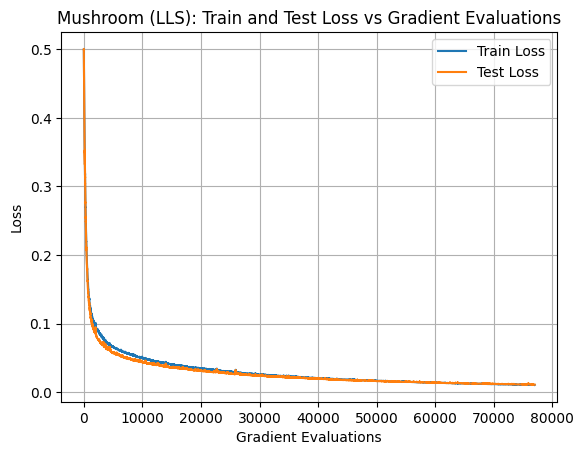

In [36]:
problem = Problem("LinearLeastSquares", w0, X_train, y_train, X_test, y_test)
# method = Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5,
#                 c1=1e-4)
method = Method("StochasticGradient", step_type="Constant", constant_step_size=1e-3, batch_size=1)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals = history['grad_evals']
train_loss = history['train_loss']
test_loss = history['test_loss']
train_acc = history['train_acc']
test_acc = history['test_acc']

print("Final train loss: ", train_loss_f)
print("Final test loss: ", test_loss_f)
print("Final train accuracy: ", train_acc_f)
print("Final test accuracy: ", test_acc_f)

# Plot train loss vs gradient evaluations
plt.figure()
plt.plot(grad_evals, train_loss, label='Train Loss')
plt.plot(grad_evals, test_loss, label='Test Loss')
plt.xlabel('Gradient Evaluations')
plt.ylabel('Loss')
plt.title('Mushroom (LLS): Train and Test Loss vs Gradient Evaluations')
plt.legend()
plt.grid()

Final train loss:  0.37449315461743143
Final test loss:  0.37264194104529547
Final train accuracy:  0.8818181818181818
Final test accuracy:  0.9024242424242425


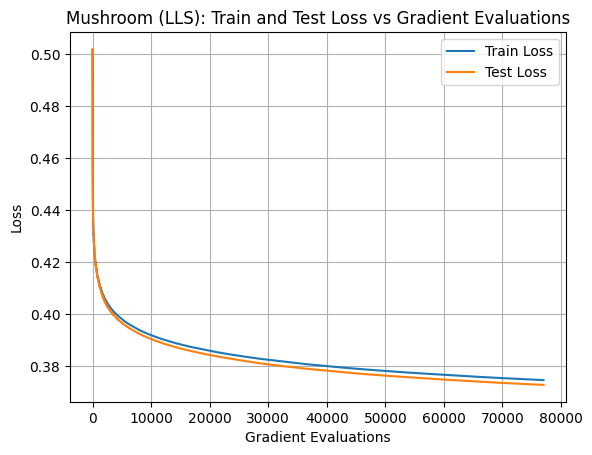

In [41]:
problem = Problem("LinearLeastSquares", w0, X_train, y_train, X_test, y_test)
# method = Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5,
#                 c1=1e-4)
method = Method("StochasticGradient", step_type="Diminishing", alpha = 1e-2)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals = history['grad_evals']
train_loss = history['train_loss']
test_loss = history['test_loss']
train_acc = history['train_acc']
test_acc = history['test_acc']

print("Final train loss: ", train_loss_f)
print("Final test loss: ", test_loss_f)
print("Final train accuracy: ", train_acc_f)
print("Final test accuracy: ", test_acc_f)

# Plot train loss vs gradient evaluations
plt.figure()
plt.plot(grad_evals, train_loss, label='Train Loss')
plt.plot(grad_evals, test_loss, label='Test Loss')
plt.xlabel('Gradient Evaluations')
plt.ylabel('Loss')
plt.title('Mushroom (LLS): Train and Test Loss vs Gradient Evaluations')
plt.legend()
plt.grid()

Final train loss:  0.12109570499817351
Final test loss:  0.11539832528329484
Final train accuracy:  0.9368831168831169
Final test accuracy:  0.9569696969696969


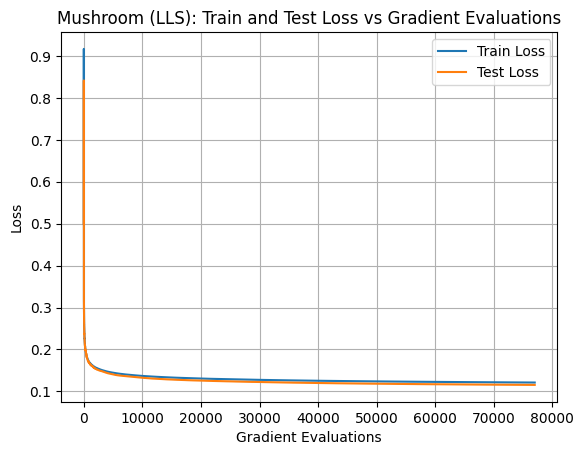

In [42]:
problem = Problem("LinearLeastSquares", w0, X_train, y_train, X_test, y_test)
# method = Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5,
#                 c1=1e-4)
method = Method("StochasticGradient", step_type="Diminishing", alpha = 1e-1)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals = history['grad_evals']
train_loss = history['train_loss']
test_loss = history['test_loss']
train_acc = history['train_acc']
test_acc = history['test_acc']

print("Final train loss: ", train_loss_f)
print("Final test loss: ", test_loss_f)
print("Final train accuracy: ", train_acc_f)
print("Final test accuracy: ", test_acc_f)

# Plot train loss vs gradient evaluations
plt.figure()
plt.plot(grad_evals, train_loss, label='Train Loss')
plt.plot(grad_evals, test_loss, label='Test Loss')
plt.xlabel('Gradient Evaluations')
plt.ylabel('Loss')
plt.title('Mushroom (LLS): Train and Test Loss vs Gradient Evaluations')
plt.legend()
plt.grid()

Final train loss:  0.8879006660774732
Final test loss:  0.8833601569121443
Final train accuracy:  0.7561038961038961
Final test accuracy:  0.7339393939393939


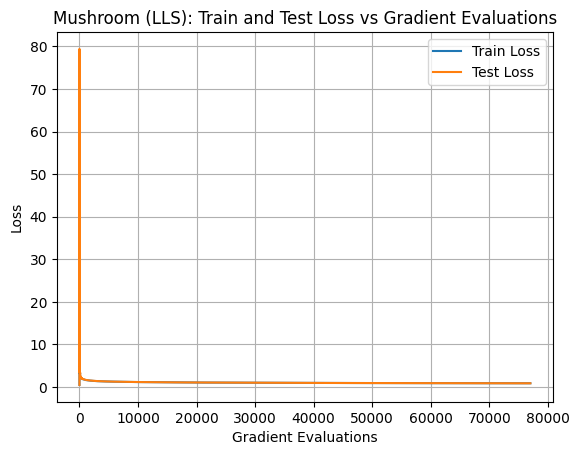

In [44]:
problem = Problem("LinearLeastSquares", w0, X_train, y_train, X_test, y_test)
# method = Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5,
#                 c1=1e-4)
method = Method("StochasticGradient", step_type="Diminishing", alpha = 0.5)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals = history['grad_evals']
train_loss = history['train_loss']
test_loss = history['test_loss']
train_acc = history['train_acc']
test_acc = history['test_acc']

print("Final train loss: ", train_loss_f)
print("Final test loss: ", test_loss_f)
print("Final train accuracy: ", train_acc_f)
print("Final test accuracy: ", test_acc_f)

# Plot train loss vs gradient evaluations
plt.figure()
plt.plot(grad_evals, train_loss, label='Train Loss')
plt.plot(grad_evals, test_loss, label='Test Loss')
plt.xlabel('Gradient Evaluations')
plt.ylabel('Loss')
plt.title('Mushroom (LLS): Train and Test Loss vs Gradient Evaluations')
plt.legend()
plt.grid()

Final train loss:  0.18151546353518774
Final test loss:  0.1713456166741325
Final train accuracy:  0.8831168831168831
Final test accuracy:  0.9054545454545454


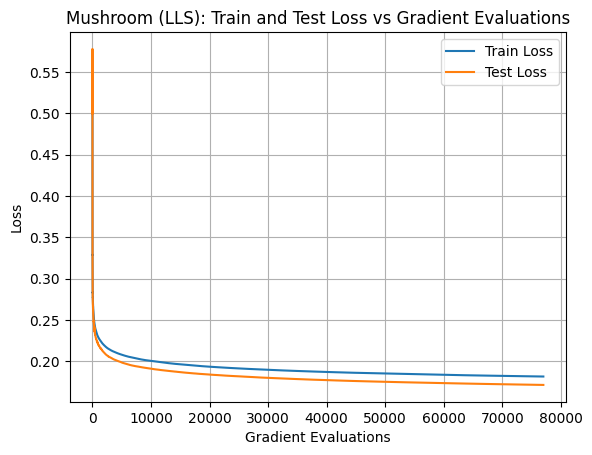

In [46]:
problem = Problem("LinearLeastSquares", w0, X_train, y_train, X_test, y_test)
# method = Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5,
#                 c1=1e-4)
method = Method("StochasticGradient", step_type="Diminishing", alpha = 0.5e-1)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals = history['grad_evals']
train_loss = history['train_loss']
test_loss = history['test_loss']
train_acc = history['train_acc']
test_acc = history['test_acc']

print("Final train loss: ", train_loss_f)
print("Final test loss: ", test_loss_f)
print("Final train accuracy: ", train_acc_f)
print("Final test accuracy: ", test_acc_f)

# Plot train loss vs gradient evaluations
plt.figure()
plt.plot(grad_evals, train_loss, label='Train Loss')
plt.plot(grad_evals, test_loss, label='Test Loss')
plt.xlabel('Gradient Evaluations')
plt.ylabel('Loss')
plt.title('Mushroom (LLS): Train and Test Loss vs Gradient Evaluations')
plt.legend()
plt.grid()

### Results

In [47]:
# Gradient Descent with backtracking
problem = Problem("LinearLeastSquares", w0, X_train, y_train, X_test, y_test)
method = Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5,
                c1=1e-4)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history_gd = optSolver(problem, method, options)

# Stochastic Gradient Descent with constant step size
method = Method("StochasticGradient", step_type="Constant", constant_step_size=1e-2, batch_size=1)
w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history_sg_const = optSolver(problem, method, options)

# Stochastic Gradient Descent with constant step size
method = Method("StochasticGradient", step_type="Diminishing", alpha = 1e-1)
w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history_sg_dim = optSolver(problem, method, options)


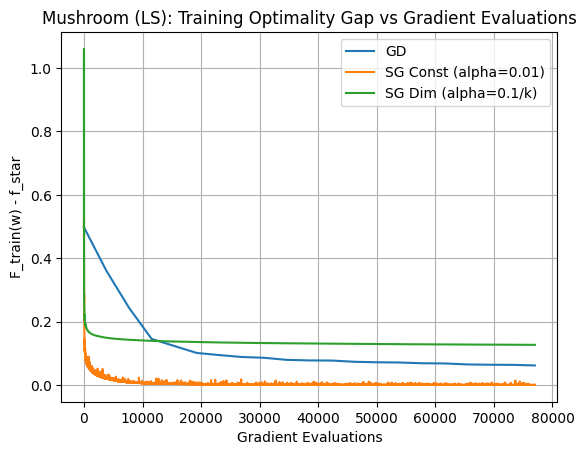

In [57]:
generateTrainLossPlots("Mushroom (LS)", f_star_LS_mushroom, 1e-2, 1e-1, history_gd, history_sg_const, history_sg_dim)

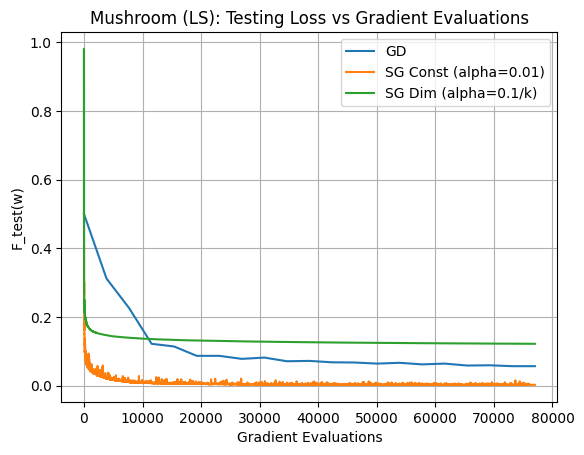

In [61]:
generateTestLossPlots("Mushroom (LS)", 1e-2, 1e-1, history_gd, history_sg_const, history_sg_dim)

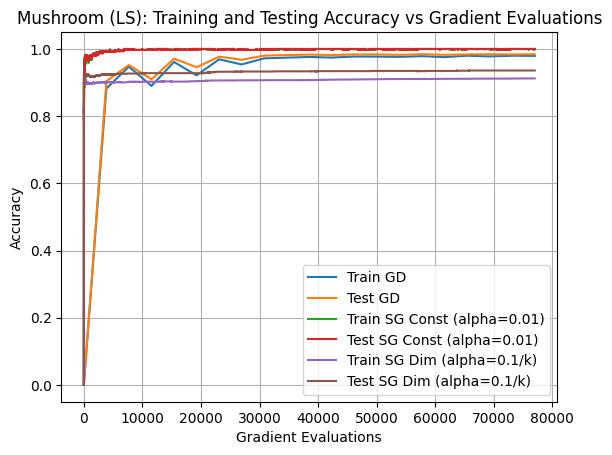

In [59]:
generateTrainTestAccPlots("Mushroom (LS)", 1e-2, 1e-1, history_gd, history_sg_const, history_sg_dim)

## Logistic Regression

### Tinkering

Final train loss:  0.17401991396993258
Final test loss:  0.16248532993154868
Final train accuracy:  0.9446753246753247
Final test accuracy:  0.9648484848484848


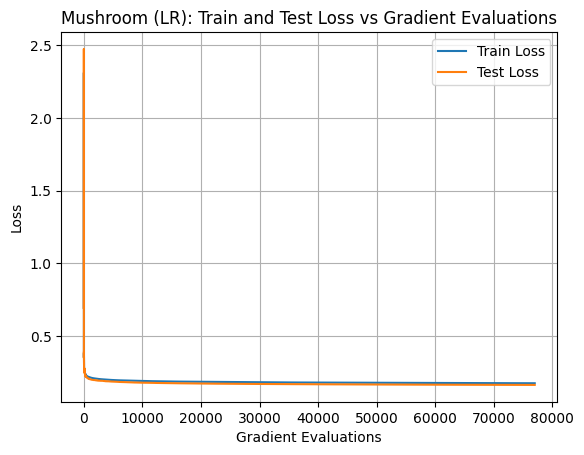

In [126]:
problem = Problem("LogisticRegression", w0, X_train, y_train, X_test, y_test)
# method = Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5,
#                 c1=1e-4)
method = Method("StochasticGradient", step_type="Diminishing", alpha = 1)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals = history['grad_evals']
train_loss = history['train_loss']
test_loss = history['test_loss']
train_acc = history['train_acc']
test_acc = history['test_acc']

print("Final train loss: ", train_loss_f)
print("Final test loss: ", test_loss_f)
print("Final train accuracy: ", train_acc_f)
print("Final test accuracy: ", test_acc_f)

# Plot train loss vs gradient evaluations
plt.figure()
plt.plot(grad_evals, train_loss, label='Train Loss')
plt.plot(grad_evals, test_loss, label='Test Loss')
plt.xlabel('Gradient Evaluations')
plt.ylabel('Loss')
plt.title('Mushroom (LR): Train and Test Loss vs Gradient Evaluations')
plt.legend()
plt.grid()

Final train loss:  0.46473539052282065
Final test loss:  0.46382215550533257
Final train accuracy:  0.9184415584415584
Final test accuracy:  0.9406060606060606


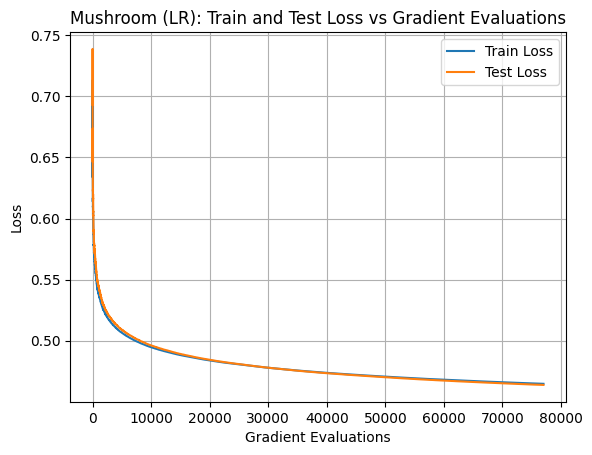

In [128]:
problem = Problem("LogisticRegression", w0, X_train, y_train, X_test, y_test)
# method = Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5,
#                 c1=1e-4)
method = Method("StochasticGradient", step_type="Diminishing", alpha = 1e-1)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals = history['grad_evals']
train_loss = history['train_loss']
test_loss = history['test_loss']
train_acc = history['train_acc']
test_acc = history['test_acc']

print("Final train loss: ", train_loss_f)
print("Final test loss: ", test_loss_f)
print("Final train accuracy: ", train_acc_f)
print("Final test accuracy: ", test_acc_f)

# Plot train loss vs gradient evaluations
plt.figure()
plt.plot(grad_evals, train_loss, label='Train Loss')
plt.plot(grad_evals, test_loss, label='Test Loss')
plt.xlabel('Gradient Evaluations')
plt.ylabel('Loss')
plt.title('Mushroom (LR): Train and Test Loss vs Gradient Evaluations')
plt.legend()
plt.grid()

Final train loss:  0.6596960612441805
Final test loss:  0.6596562053117114
Final train accuracy:  0.8802597402597403
Final test accuracy:  0.8951515151515151


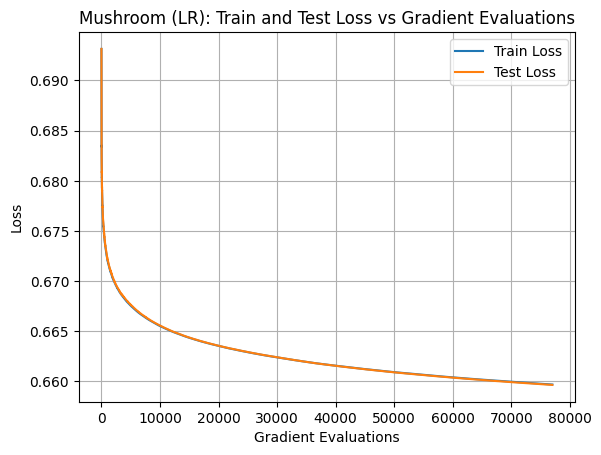

In [129]:
problem = Problem("LogisticRegression", w0, X_train, y_train, X_test, y_test)
# method = Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5,
#                 c1=1e-4)
method = Method("StochasticGradient", step_type="Diminishing", alpha = 1e-2)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals = history['grad_evals']
train_loss = history['train_loss']
test_loss = history['test_loss']
train_acc = history['train_acc']
test_acc = history['test_acc']

print("Final train loss: ", train_loss_f)
print("Final test loss: ", test_loss_f)
print("Final train accuracy: ", train_acc_f)
print("Final test accuracy: ", test_acc_f)

# Plot train loss vs gradient evaluations
plt.figure()
plt.plot(grad_evals, train_loss, label='Train Loss')
plt.plot(grad_evals, test_loss, label='Test Loss')
plt.xlabel('Gradient Evaluations')
plt.ylabel('Loss')
plt.title('Mushroom (LR): Train and Test Loss vs Gradient Evaluations')
plt.legend()
plt.grid()

### Results

In [4]:
# Gradient Descent with backtracking
problem = Problem("LogisticRegression", w0, X_train, y_train, X_test, y_test)
method = Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5,
                c1=1e-4)
options = Options(term_tol=1e-6, max_iterations=1e2)

w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals_gd = history['grad_evals']
train_loss_gd = history['train_loss']
test_loss_gd = history['test_loss']
train_acc_gd = history['train_acc']
test_acc_gd = history['test_acc']

# Stochastic Gradient Descent with constant step size
method = Method("StochasticGradient", step_type="Constant", constant_step_size=1, batch_size=1)
w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals_sg_const = history['grad_evals']
train_loss_sg_const = history['train_loss']
test_loss_sg_const = history['test_loss']
train_acc_sg_const = history['train_acc']
test_acc_sg_const = history['test_acc']

# Stochastic Gradient Descent with constant step size
method = Method("StochasticGradient", step_type="Diminishing", alpha = 1)
w, train_loss_f, train_acc_f, test_loss_f, test_acc_f, history = optSolver(problem, method, options)

grad_evals_sg_dim = history['grad_evals']
train_loss_sg_dim = history['train_loss']
test_loss_sg_dim = history['test_loss']
train_acc_sg_dim = history['train_acc']
test_acc_sg_dim = history['test_acc']


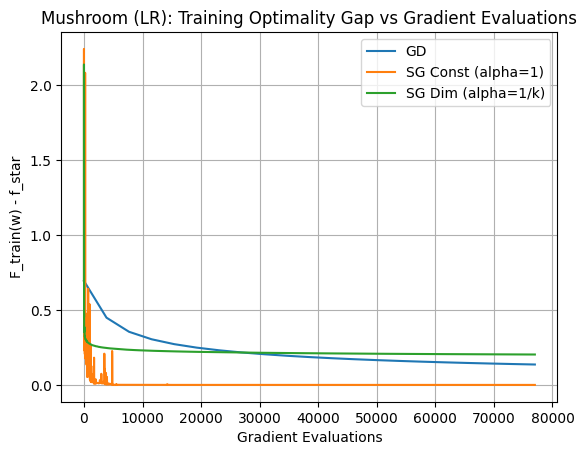

In [20]:
# Plot optimality gap on training loss vs gradient evaluations
plt.figure()
plt.plot(grad_evals_gd, train_loss_gd-f_star_LR_mushroom, label='GD')
plt.plot(grad_evals_sg_const, train_loss_sg_const-f_star_LR_mushroom, label='SG Const (alpha=1)')
plt.plot(grad_evals_sg_dim, train_loss_sg_dim-f_star_LR_mushroom, label='SG Dim (alpha=1/k)')
plt.xlabel('Gradient Evaluations')
plt.ylabel('F_train(w) - f_star')
plt.title('Mushroom (LR): Training Optimality Gap vs Gradient Evaluations')
plt.legend()
plt.grid()

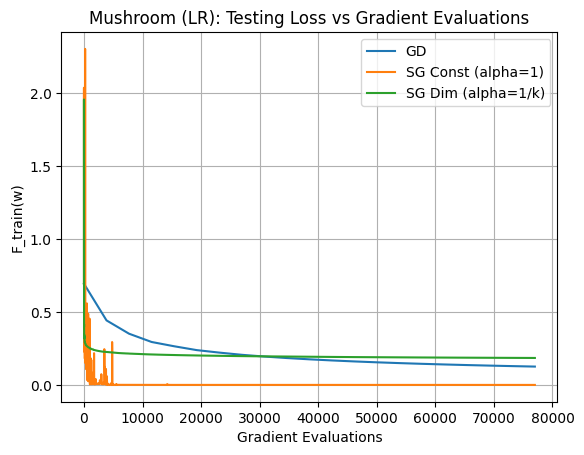

In [22]:
# Plot optimality gap on training loss vs gradient evaluations
plt.figure()
plt.plot(grad_evals_gd, test_loss_gd, label='GD')
plt.plot(grad_evals_sg_const, test_loss_sg_const, label='SG Const (alpha=1)')
plt.plot(grad_evals_sg_dim, test_loss_sg_dim, label='SG Dim (alpha=1/k)')
plt.xlabel('Gradient Evaluations')
plt.ylabel('F_train(w)')
plt.title('Mushroom (LR): Testing Loss vs Gradient Evaluations')
plt.legend()
plt.grid()

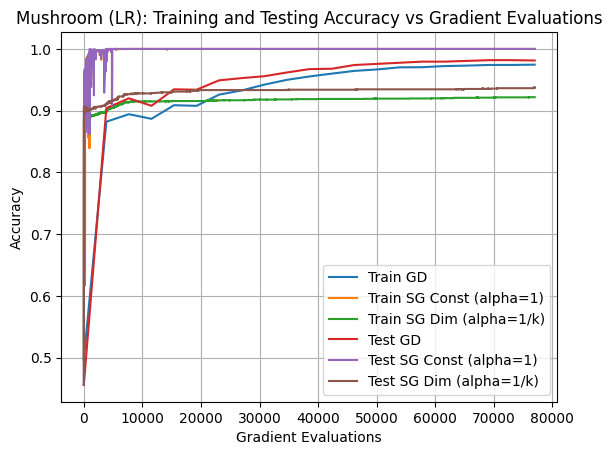

In [23]:
# Plot training and testing accuracy vs gradient evaluations
plt.figure()
plt.plot(grad_evals_gd, train_acc_gd, label='Train GD')
plt.plot(grad_evals_sg_const, train_acc_sg_const, label='Train SG Const (alpha=1)')
plt.plot(grad_evals_sg_dim, train_acc_sg_dim, label='Train SG Dim (alpha=1/k)')
plt.plot(grad_evals_gd, test_acc_gd, label='Test GD')
plt.plot(grad_evals_sg_const, test_acc_sg_const, label='Test SG Const (alpha=1)')
plt.plot(grad_evals_sg_dim, test_acc_sg_dim, label='Test SG Dim (alpha=1/k)')
plt.xlabel('Gradient Evaluations')
plt.ylabel('Accuracy')
plt.title('Mushroom (LR): Training and Testing Accuracy vs Gradient Evaluations')
plt.legend()
plt.grid()